In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt, caesar
from modules.visualize.render_rgb import RenderRGB, SingleRender
import modules as anal
import modules.anal_func as anal_func

In [2]:
snap = 104
n = 60
sb = anal.Simba('cis', size='50_full')
z = sb.get_z_from_snap(snap)
print(f'Snap {snap} is at z={z}')
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)
print(snapfile)

Snap 104 is at z=1.022199708398802
/mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full/snap_m50n512_104.hdf5


In [19]:
cs = sb.get_caesar(104)
sfr = np.asarray([i.sfr for i in cs.galaxies])
m = np.asarray([i.masses['stellar'] for i in cs.galaxies])


yt : [INFO     ] 2024-10-25 11:03:37,433 Opening /mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/noagn//Groups/m50n512_104.hdf5
yt : [INFO     ] 2024-10-25 11:03:37,483 Found 66307 halos
yt : [INFO     ] 2024-10-25 11:03:37,529 Found 4948 galaxies


[6.929573332504088e-11, 7.110263811364286e-11, 5.2086830780628145e-11, 7.443513638897084e-11, 6.440566432579021e-11, 5.836544227230684e-11, 8.997947307342274e-11, 6.6486322344866386e-12, 6.181917822871184e-11, 9.369424950169969e-11, 9.70634173891082e-11, 9.789315882442351e-11, 7.928107430638899e-11, 4.195338568340624e-11, 8.097513550925716e-11, 8.175723623267367e-11, 0.0, 6.861245813606623e-11, 4.284607633050572e-11, 6.195599423917154e-11, 4.948090751252285e-11, 8.156592479710228e-11, 7.003235839614135e-11, 5.023473133077021e-11, 5.992859106138814e-11, 7.976081891597552e-11, 3.3377984157970895e-12, 6.667497814009292e-11, 4.229516973579604e-11, 7.594143446303295e-11, 6.002965308292792e-11, 0.0, 0.0, 7.944150238390163e-11, 8.32553235986159e-11, 6.078633042547953e-11, 5.904709655977236e-11, 0.0, 0.0, 0.0, 0.0, 7.309746888419901e-11, 0.0, 0.0, 0.0, 2.0499753731472093e-11, 2.1045881668713814e-11, 0.0, 4.900961225449825e-11, 7.636514117876143e-11, 0.0, 0.0, 0.0, 0.0, 8.655970118085322e-11, 0

In [5]:
toplot = ['Masses', 'Masses', 'Masses_s']

In [11]:
render = RenderRGB(snapfile, catfile, n, toplot, region=False, ifdust=True, dim=['Msun', 'Msun', 'Msun'])

yt : [INFO     ] 2024-10-22 18:57:34,287 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-22 18:57:34,302 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2024-10-22 18:57:34,303 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-22 18:57:34,420 Parameters: current_time              = 1.8402007737381914e+17 s
yt : [INFO     ] 2024-10-22 18:57:34,420 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-22 18:57:34,421 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-22 18:57:34,422 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-22 18:57:34,423 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-22 18:57:34,424 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2024-10-22 18:57:34,425 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-22 18:57:34,425 Parame

Camera settings: Center=[15453.045 21049.094 23608.852], Extent=10, Theta=None, Phi=0, Roll=0, Radius=infinity, XSize=400, YSize=400


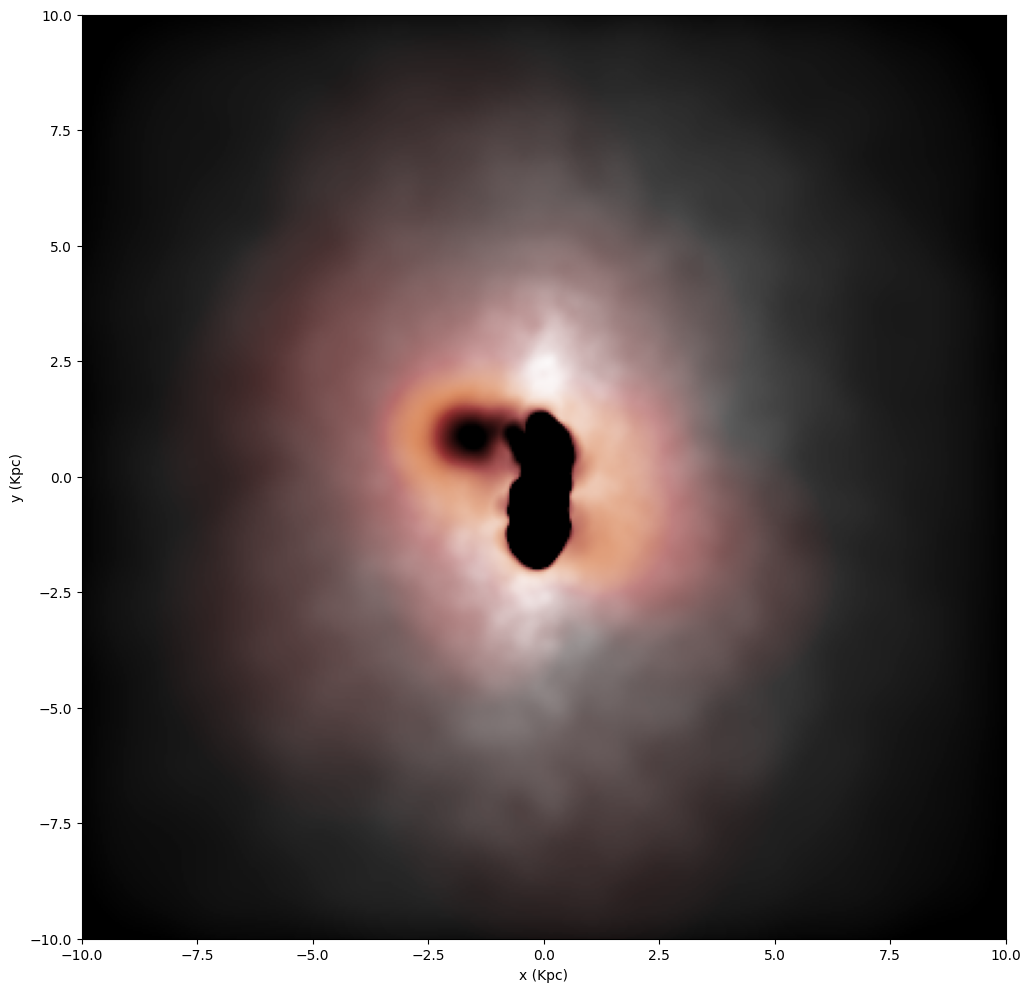

In [7]:
camera = render.set_camera(r='infinity', p=0, t=None, extent=10, zoom=2, spos=None)
image = render.generate_images(camera, vmin=1, vmax=99)
render.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}_noagn')

In [3]:
ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()
gal = [i for i in obj.galaxies if i.GroupID == n][0]
center = gal.pos.in_units('kpc').value

yt : [INFO     ] 2024-10-25 14:53:56,403 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-25 14:53:56,490 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2024-10-25 14:53:56,493 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-25 14:53:56,634 Parameters: current_time              = 1.8402007737381914e+17 s
yt : [INFO     ] 2024-10-25 14:53:56,635 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-25 14:53:56,636 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-25 14:53:56,637 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-25 14:53:56,638 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-25 14:53:56,638 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2024-10-25 14:53:56,639 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-25 14:53:56,640 Parame

In [4]:
data = ad['PartType0', 'NWindLaunches'][gal.glist]
pos  = ad['PartType0', 'Coordinates']
#hi_ab = ds.arr(data, 'code_mass').in_units('Msun').value
#hi_ab = ad['PartType0', 'Temperature'][gal.glist].in_units('K').value
#plt.scatter(pos[:,0], pos[:,1], data)

In [5]:
print(data)

[1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 2.000e+00 0.000e+00 1.001e+03 1.000e+00 0.000e+00 2.000e+00 1.000e+03
 0.000e+00 1.000e+00 2.000e+00 2.000e+00 2.000e+00 1.000e+00 1.000e+00
 0.000e+00 1.000e+00 1.000e+00 2.000e+00 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 2.000e+00 1.000e+03
 0.000e+00 1.000e+03 1.000e+00 1.000e+00 1.000e+00 2.000e+00 1.000e+00
 1.000e+00 2.000e+00 0.000e+00 2.000e+00 0.000e+00 1.000e+00 2.000e+00
 2.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 2.000e+00 0.000e+00 1.000e+00 1.000e+00
 3.000e+00 1.000e+00 0.000e+00 2.000e+00 0.000e+00 1.003e+03 2.000e+00
 0.000e+00] dimensionless


In [6]:
rendmap = SingleRender(snapfile, catfile, n, ('PartType0', 'Velocities'), region=False, dim='Km/s')

yt : [INFO     ] 2024-10-25 15:00:53,410 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-25 15:00:53,425 Calculating time from 4.945e-01 to be 1.840e+17 seconds
yt : [INFO     ] 2024-10-25 15:00:53,426 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-25 15:00:53,533 Parameters: current_time              = 1.8402007737381914e+17 s
yt : [INFO     ] 2024-10-25 15:00:53,534 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-25 15:00:53,535 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-25 15:00:53,536 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-25 15:00:53,537 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-25 15:00:53,538 Parameters: current_redshift          = 1.0221997149755864
yt : [INFO     ] 2024-10-25 15:00:53,539 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-25 15:00:53,539 Parame

UnitParseError: Could not find unit symbol 'Km' in the provided symbols.

In [4]:
image = rendmap.single_map(r='infinity', p=None, t=None, ex=3, zoom=1, spos='faceon', vmin=1, vmax=100, mode='log', zscale=False)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}_full')

ValueError: data_pts should be non-empty

In [8]:
rendmap = SingleRender(snapfile, catfile, n, ('PartType0', 'Dust_Masses_s'), region=False, dim='Msun')

yt : [INFO     ] 2024-09-24 10:04:41,944 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-09-24 10:04:41,955 Calculating time from 4.005e-01 to be 1.367e+17 seconds
yt : [INFO     ] 2024-09-24 10:04:41,956 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-09-24 10:04:42,031 Parameters: current_time              = 1.3672323220435099e+17 s
yt : [INFO     ] 2024-09-24 10:04:42,031 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-09-24 10:04:42,032 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-24 10:04:42,033 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-09-24 10:04:42,034 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-09-24 10:04:42,034 Parameters: current_redshift          = 1.4966919055836132
yt : [INFO     ] 2024-09-24 10:04:42,035 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-09-24 10:04:42,036 Parame

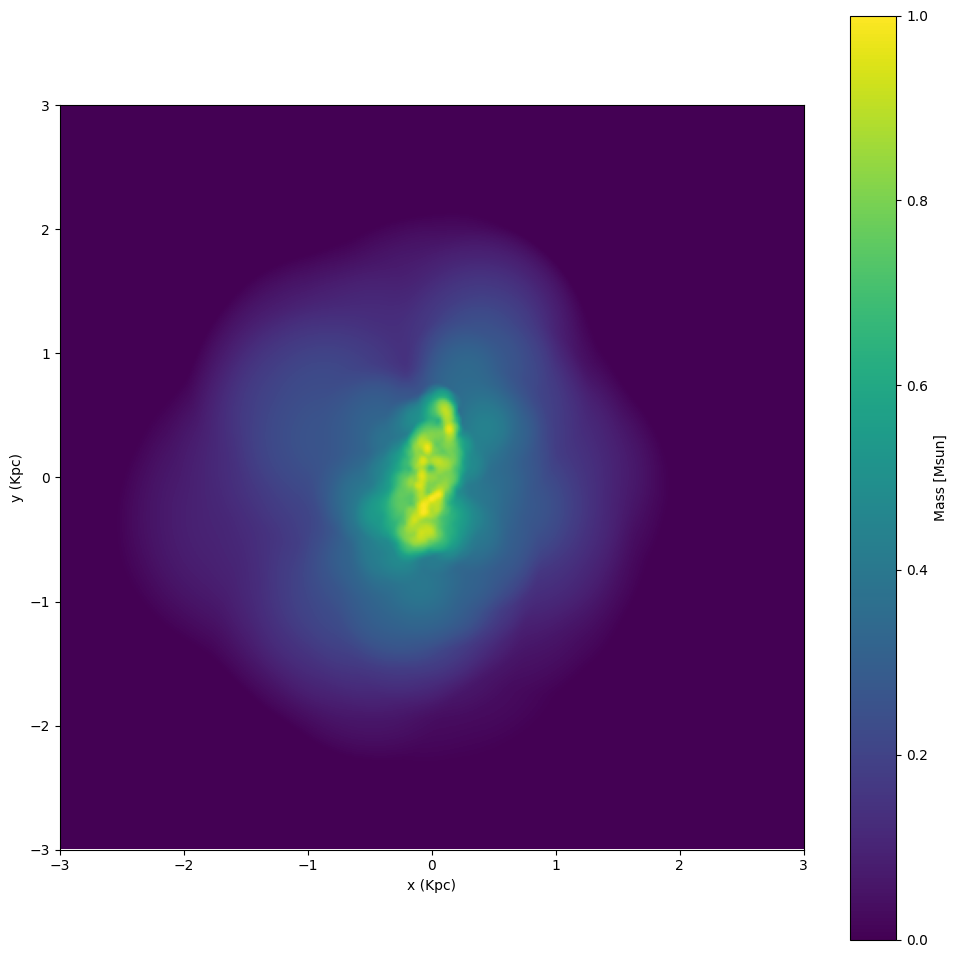

In [27]:
image = rendmap.single_map(r='infinity', p=None, t=None, ex=3, zoom=1, spos='faceon', vmin=60, vmax=100, mode='log', zscale=False)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}_noagn')

yt : [INFO     ] 2024-10-22 18:56:16,274 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-10-22 18:56:16,285 Calculating time from 4.324e-01 to be 1.525e+17 seconds
yt : [INFO     ] 2024-10-22 18:56:16,286 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-10-22 18:56:16,369 Parameters: current_time              = 1.5248150707254022e+17 s
yt : [INFO     ] 2024-10-22 18:56:16,369 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-10-22 18:56:16,370 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-22 18:56:16,371 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-10-22 18:56:16,372 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-10-22 18:56:16,373 Parameters: current_redshift          = 1.3126894983593127
yt : [INFO     ] 2024-10-22 18:56:16,374 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-10-22 18:56:16,374 Parame

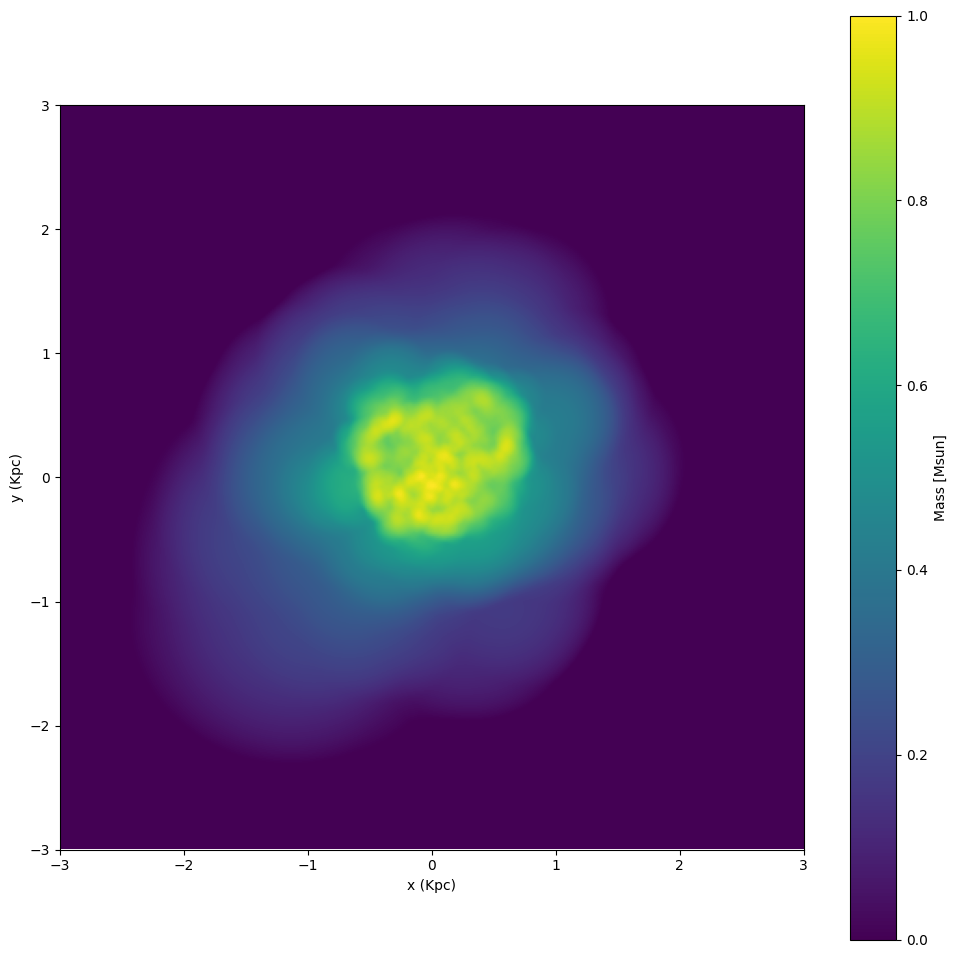

In [9]:
rendmap = SingleRender(snapfile, catfile, n, ('PartType0', 'Masses'), region=False, dim='Msun')
image = rendmap.single_map(r='infinity', p=None, t=None, ex=3, zoom=1, spos='faceon', vmin=60, vmax=100, mode='log', zscale=False)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

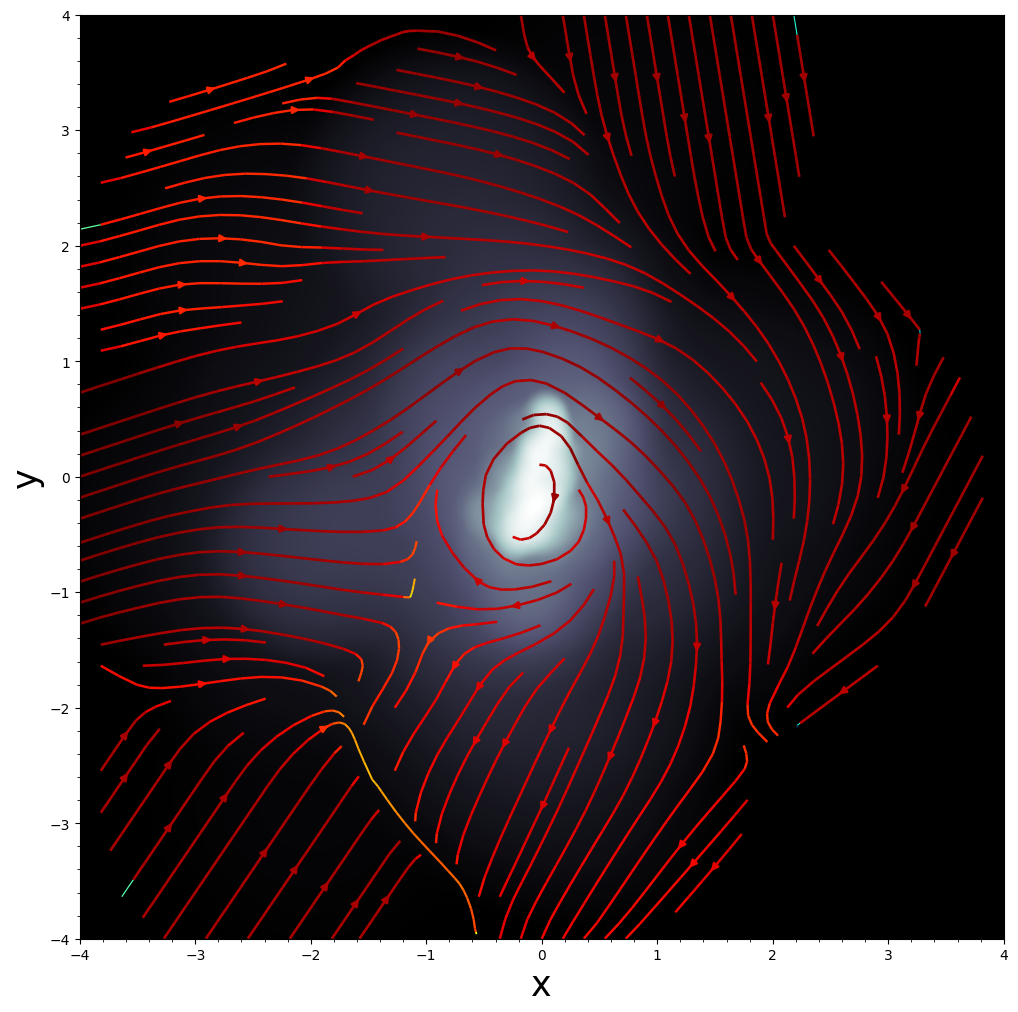

(<Figure size 1200x1200 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [18]:
rendmap.stream_plot(ex=4, p=60, t=0, xl='x',  yl='y', spos='faceon')

In [85]:
snap = 75
n = 0
sb = anal.Simba('cis', size='50_full')
z = sb.get_z_from_snap(snap)
print(f'Snap {snap} is at z={z}')
snapfile = sb.get_sim_file(snap)
catfile  = sb.get_caesar_file(snap)
print(snapfile)

rendmap = SingleRender(snapfile, catfile, n, ('PartType0', 'Temperature'), region=False, dim='K')

Snap 75 is at z=2.180135600982026
/mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full/snap_m50n512_075.hdf5


yt : [INFO     ] 2024-09-24 10:50:40,596 ComovingIntegrationOn does not exist, falling back to OmegaLambda
yt : [INFO     ] 2024-09-24 10:50:40,613 Calculating time from 3.145e-01 to be 9.625e+16 seconds
yt : [INFO     ] 2024-09-24 10:50:40,614 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-09-24 10:50:40,726 Parameters: current_time              = 9.62508916680895e+16 s
yt : [INFO     ] 2024-09-24 10:50:40,726 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-09-24 10:50:40,727 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-09-24 10:50:40,729 Parameters: domain_right_edge         = [50000. 50000. 50000.]
yt : [INFO     ] 2024-09-24 10:50:40,730 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-09-24 10:50:40,730 Parameters: current_redshift          = 2.180135607936541
yt : [INFO     ] 2024-09-24 10:50:40,731 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-09-24 10:50:40,732 Parameter

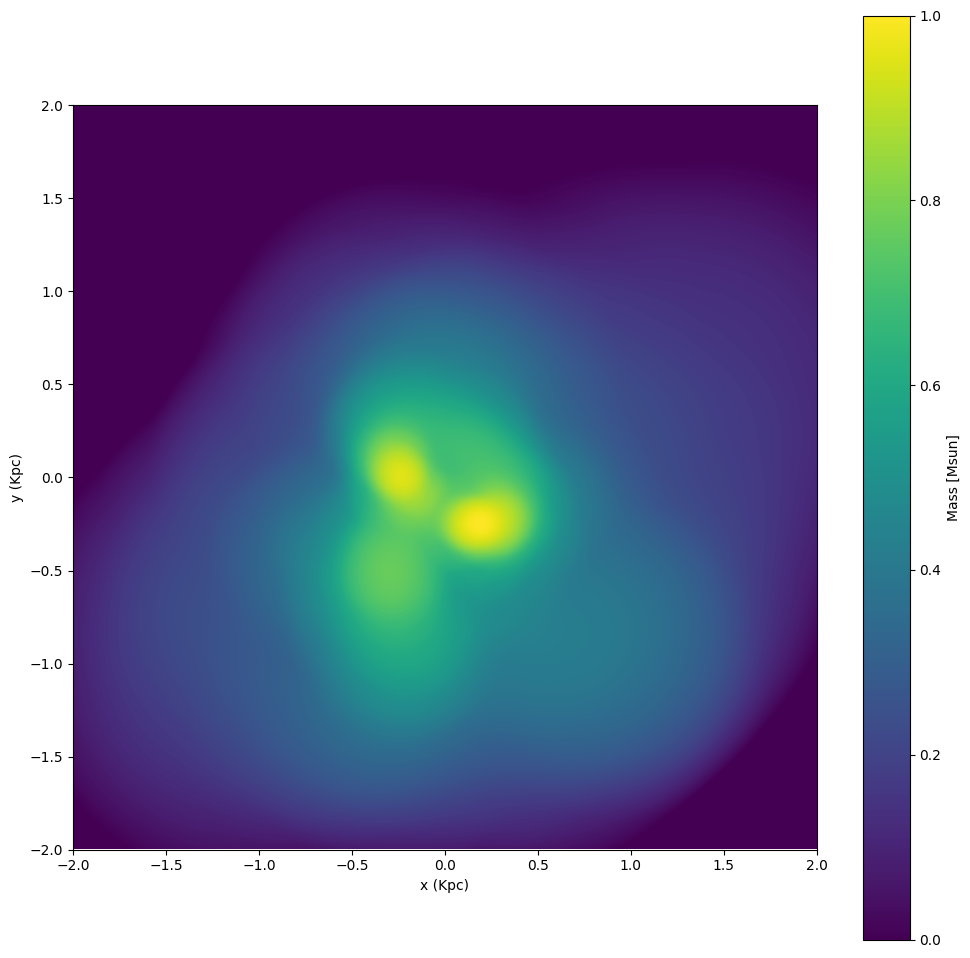

In [106]:
image = rendmap.single_map(r='infinity', p=0, t=0, ex=2, zoom=1, spos='edgeon', vmin=20, vmax=100, mode='log', zscale=False)
rendmap.plot(image, 'x (Kpc)', 'y (Kpc)', f'snap_{snap}_n{n}')

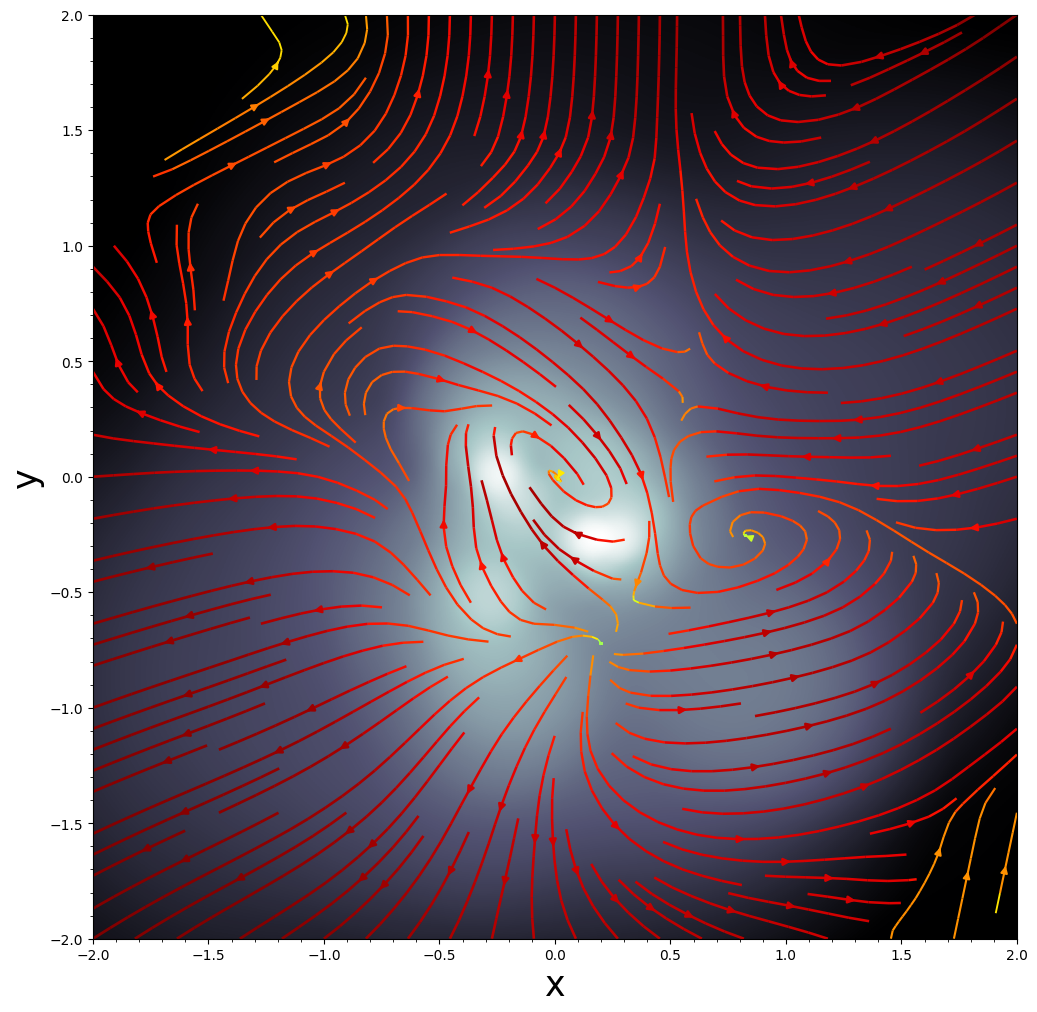

(<Figure size 1200x1200 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [122]:
rendmap.stream_plot(ex=2, p=180, t=180, xl='x',  yl='y', spos='faceon')

In [52]:
render.set_video(100, r=4, extent=4, t=30, p=0, del_t=0, del_p=360, vmin=0, vmax=100,
                 xsize=500, ysize=500, zoom=1)
render.create_video(f'snap_{snap}_n{n}', interval=100)
render.flush()

Setting camera with 100 frames, p=0, t=30, r=4, extent=4
GIF saved as /mnt/home/glorenzon/simbanator/output/plot/videos/snap_70_n0.gif


In [84]:
cs  = sb.get_caesar(75)
print([i.bh_fedd for i in cs.galaxies][0])
print([i.masses['bh'] for i in cs.galaxies][0])
print([i.nbh for i in cs.galaxies][0])

yt : [INFO     ] 2024-09-24 10:50:33,991 Opening /mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/full//Groups/m50n512_075.hdf5
yt : [INFO     ] 2024-09-24 10:50:34,088 Found 67242 halos
yt : [INFO     ] 2024-09-24 10:50:34,173 Found 3717 galaxies


0.00021633083001072856 dimensionless
1202370816.0 Msun
1


In [125]:
sb = anal.Simba('cis', size='50_noagn')
cs  = sb.get_caesar(90)
print([i.bh_fedd for i in cs.galaxies][0])
print([i.masses['stellar'] for i in cs.galaxies][0]/1e9)
print([i.nbh for i in cs.galaxies][0])

yt : [INFO     ] 2024-09-24 11:40:58,116 Opening /mnt/home/glorenzon/SIMBA_catalogs/simba50_snaps/noagn//Groups/m50n512_090.hdf5
yt : [INFO     ] 2024-09-24 11:40:58,698 Found 68092 halos
yt : [INFO     ] 2024-09-24 11:41:00,256 Found 4350 galaxies


0.00970625647965247 dimensionless
2389.56183552 Msun
4
